# Binomial Tree Option Pricing Demo

This notebook demonstrates how to use the `options_pricing.binomial_tree` module 
to compute **European and American option prices** using the Binomial Tree method.

The Binomial Tree model is a flexible numerical method that can handle both:
- **European options** (exercisable only at maturity)  
- **American options** (exercisable at any time before maturity)


## 1. Import Libraries


In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman" # Set font to Times New Roman
import sys
import os


# Add the repo root (one level up from notebooks) to Python path
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(repo_root)
# Import packages
from options_pricing.binomial_tree import binomial_tree
from options_pricing.black_scholes import black_scholes_price

## 2. Define Option Parameters


In [13]:
S = 100       # Spot price
K = 100       # Strike price
T = 1.0       # Time to maturity (years)
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility
N = 100       # Number of steps in the binomial tree


## 3. European Option Pricing (Binomial Tree)


In [14]:
call_price = binomial_tree(S, K, T, r, sigma, N, option_type='call', american=False)
put_price  = binomial_tree(S, K, T, r, sigma, N, option_type='put', american=False)

print(f"European Call Price (Binomial Tree, N={N}): {call_price:.4f}")
print(f"European Put  Price (Binomial Tree, N={N}): {put_price:.4f}")


European Call Price (Binomial Tree, N=100): 10.4306
European Put  Price (Binomial Tree, N=100): 5.5536


## 4. American Option Pricing (Binomial Tree)


In [15]:
call_price_american = binomial_tree(S, K, T, r, sigma, N, option_type='call', american=True)
put_price_american  = binomial_tree(S, K, T, r, sigma, N, option_type='put', american=True)

print(f"American Call Price (Binomial Tree, N={N}): {call_price_american:.4f}")
print(f"American Put  Price (Binomial Tree, N={N}): {put_price_american:.4f}")


American Call Price (Binomial Tree, N=100): 10.4306
American Put  Price (Binomial Tree, N=100): 6.0824


## 5. Comparison with Black–Scholes

As the number of steps `N` increases, the **binomial tree price** should converge 
to the **Black–Scholes closed-form price** (for European options).


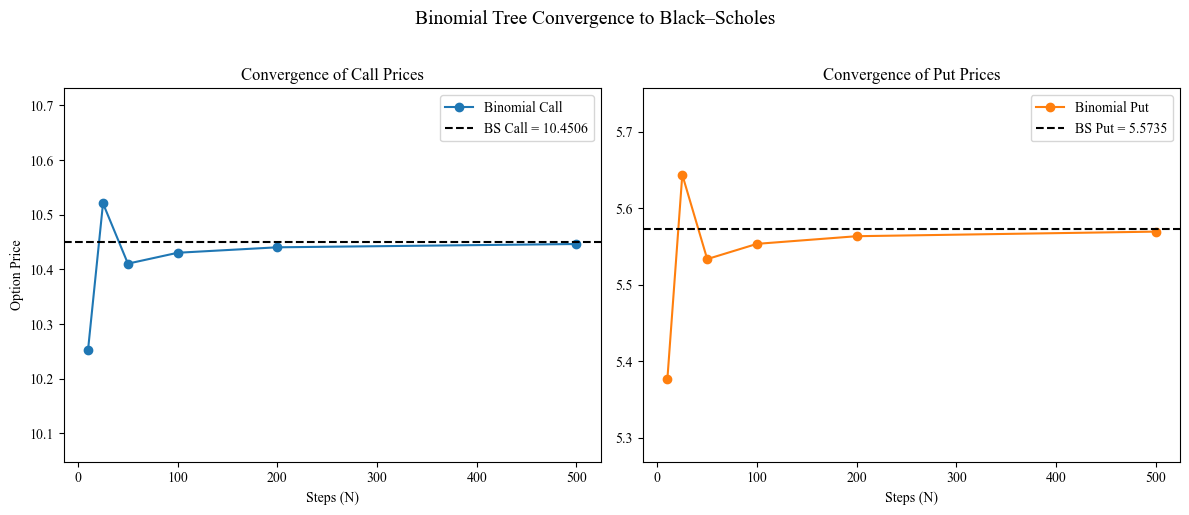

In [16]:
steps = [10, 25, 50, 100, 200, 500]
call_prices = [binomial_tree(S, K, T, r, sigma, n, option_type='call') for n in steps]
put_prices  = [binomial_tree(S, K, T, r, sigma, n, option_type='put')  for n in steps]

# Black–Scholes reference values
bs_call = black_scholes_price(S, K, T, r, sigma, option_type='call')
bs_put  = black_scholes_price(S, K, T, r, sigma, option_type='put')

fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True)

# Call panel
axes[0].plot(steps, call_prices, marker='o', color='tab:blue', label='Binomial Call')
axes[0].axhline(bs_call, ls='--', color='black', label=f'BS Call = {bs_call:.4f}')
axes[0].set_title("Convergence of Call Prices")
axes[0].set_xlabel("Steps (N)")
axes[0].set_ylabel("Option Price")
axes[0].legend()
# Zoom y-axis around values
axes[0].set_ylim(min(call_prices + [bs_call]) * 0.98, max(call_prices + [bs_call]) * 1.02)

# Put panel
axes[1].plot(steps, put_prices, marker='o', color='tab:orange', label='Binomial Put')
axes[1].axhline(bs_put, ls='--', color='black', label=f'BS Put = {bs_put:.4f}')
axes[1].set_title("Convergence of Put Prices")
axes[1].set_xlabel("Steps (N)")
axes[1].legend()
axes[1].set_ylim(min(put_prices + [bs_put]) * 0.98, max(put_prices + [bs_put]) * 1.02)

plt.suptitle("Binomial Tree Convergence to Black–Scholes", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


## 6. Summary

In this demo, we have:

- Implemented **binomial tree pricing** for European and American options.  
- Shown how prices **converge as the number of steps increases**.  
- Verified that the **binomial tree matches Black–Scholes prices** for European options.  

This confirms the correctness of our implementation, while highlighting that 
the binomial tree is more versatile since it can also handle **American options**.
